In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt
from config import Config, load_config, save_config

In [2]:
# Arm 1 length
l_1 = 0.6
l_1_total = 36 * 25.4e-3  # 36 inches

# Offset distance from origin to end of arm 2
offset = 0.1
offset_angle = math.atan2(offset, l_1)
theta_2_init_offset = math.pi - offset_angle

# Calculate other arm lengths
l_2 = math.sqrt(l_1**2 + offset**2)
l_b = l_1_total - l_1

# Calculate arm 1 density from radius and thickness
r_1 = 25e-3 / 2
thickness = 1.5e-3
# Aluminum 2.7 g/cm^3
rho_material = 2.7 * 1e-3 * (100**3)  # g/cm^3 to kg/m^3
# Cross section area
cross_section_area = np.pi * (r_1**2 - (r_1 - thickness) ** 2)  # m^2
# Linear density
rho_1 = cross_section_area * rho_material  # kg/m

# Arm 2 density and radius
rho_2 = 0.1e-3
r_2 = 1e-3

# Joint mass and radius
m_j = 10e-3
r_j = 20e-3 / 2

# Projectile mass and radius
m_p = 12e-3
r_p = 28e-3 / 2

# Balance mass and radius
m_b = (rho_1 * l_1**2 / 2 - rho_1 * l_b**2 / 2 + m_j * l_1) / l_b
r_b = 100e-3 / 2
assert m_b >= 0, "Balance mass cannot be negative"

print(f"Rod 1 length: {l_1:.3f} m")
print(f"Rod 2 length: {l_2:.3f} m")
print(f"Rod b length: {l_b:.3f} m")
print(f"Balance mass: {m_b:.3f} kg")

# Mass and radius of the driving weight
m_d = 40
r_d = 18 * 25.4e-3 / 2  # 18 inches

# Radius of driving axle
pipe_sizes_inch = {
    "3/8": 0.675,
    "1/2": 0.84,
    "3/4": 1.05,
    "1": 1.315,
    "1-1/4": 1.66,
    "1-1/2": 1.9,
}
pipe_thickness_inch = {
    "3/8": 0.091,
    "1/2": 0.109,
    "3/4": 0.113,
    "1": 0.133,
    "1-1/4": 0.140,
    "1-1/2": 0.145,
}
pipe_size = "1"
r_a = pipe_sizes_inch[pipe_size] * 25.4e-3 / 2

# Extra inertia from driving axle
axle_len = 24 * 25.4e-3  # 24 inches
axle_thickness = pipe_thickness_inch[pipe_size] * 25.4e-3
# Steel 7.85 g/cm^3
axle_density = 7.85 * 1e-3 * (100**3)  # g/cm^3 to kg/m^3
axle_cross_section_area = math.pi * (r_a**2 - (r_a - axle_thickness) ** 2)  # m^2
axle_mass = axle_cross_section_area * axle_density * axle_len  # kg
axle_inertia = axle_mass * (r_a**2 + (r_a - axle_thickness) ** 2) / 2  # kg*m^2

Rod 1 length: 0.600 m
Rod 2 length: 0.608 m
Rod b length: 0.314 m
Balance mass: 0.143 kg


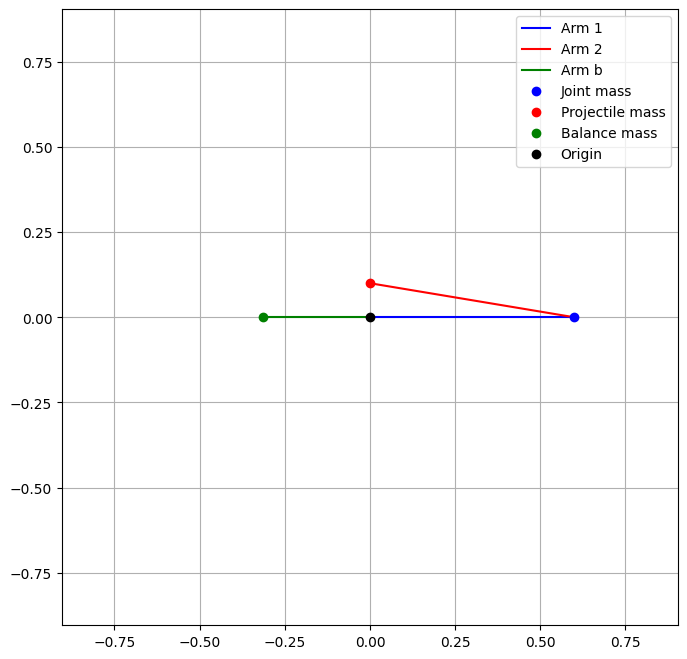

In [3]:
# Plot the design
theta_1_init = 0
theta_2_init = theta_1_init + np.pi - offset_angle

# End of arm 1
x_1 = l_1 * np.cos(theta_1_init)
y_1 = l_1 * np.sin(theta_1_init)
# End of arm 2
x_2 = x_1 + l_2 * np.cos(theta_2_init)
y_2 = y_1 + l_2 * np.sin(theta_2_init)
# End of arm b
x_b = -l_b * np.cos(theta_1_init)
y_b = -l_b * np.sin(theta_1_init)

plt.figure(figsize=(8, 8))
plt.plot([0, x_1], [0, y_1], "b-", label="Arm 1")
plt.plot([x_1, x_2], [y_1, y_2], "r-", label="Arm 2")
plt.plot([0, x_b], [0, y_b], "g-", label="Arm b")
plt.plot(x_1, y_1, "bo", label="Joint mass")
plt.plot(x_2, y_2, "ro", label="Projectile mass")
plt.plot(x_b, y_b, "go", label="Balance mass")
plt.plot(0, 0, "ko", label="Origin")

max_size = l_1 + 0.5 * l_2
plt.xlim(-max_size, max_size)
plt.ylim(-max_size, max_size)
plt.gca().set_aspect("equal", adjustable="box")
plt.grid()
plt.legend()
plt.show()

In [4]:
# Save to file
config = Config(
    l_1=l_1,
    l_2=l_2,
    l_b=l_b,
    m_j=m_j,
    m_p=m_p,
    m_b=m_b,
    rho_1=rho_1,
    rho_2=rho_2,
    I_extra=axle_inertia,
    m_d=m_d,
    r_a=r_a,
    r_1=r_1,
    r_2=r_2,
    r_j=r_j,
    r_p=r_p,
    r_b=r_b,
    theta_2_init_offset=theta_2_init_offset,
)

save_config(config, "design_1.yaml", overwrite=True)